## Titanic - Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv(r"C:\Users\jaysa\Desktop\train(titanic Survival Prediction).csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.duplicated().sum()


0

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


[]

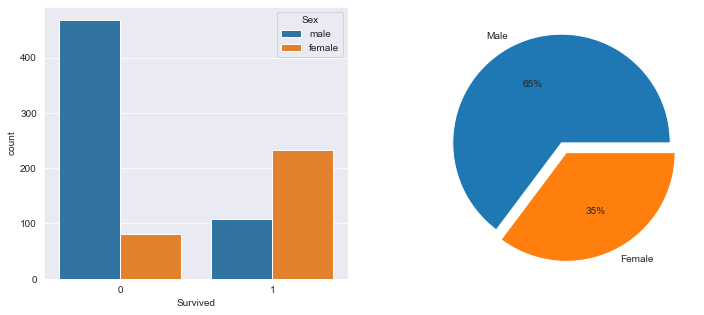

In [7]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x="Survived",hue="Sex", data=df, ax=ax[0])
ax[1].pie(x=df.Sex.value_counts(), explode=[0,0.1], labels=["Male", "Female"],autopct="%.0f%%")
ax[1].plot()

C:\Users\jaysa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jaysa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

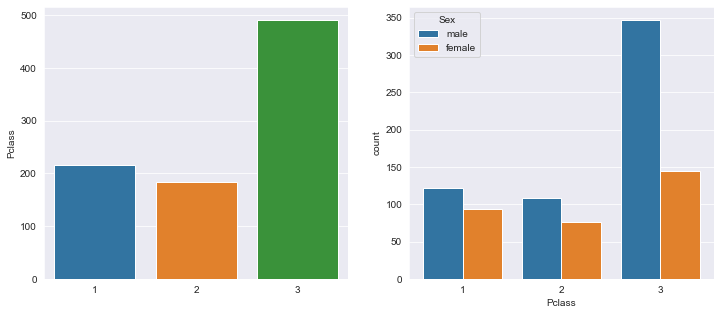

In [9]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

sns.barplot(df.Pclass.unique(), df.Pclass.value_counts(), data=df,ax=ax[0])
sns.countplot("Pclass", hue="Sex", data=df,ax=ax[1])
ax[1].plot()

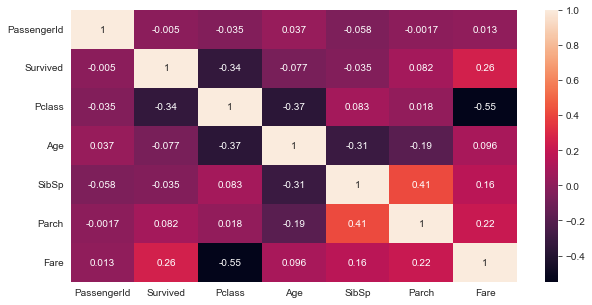

In [11]:
correlation = df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation, annot=True);

In [12]:
df['Salutation'] = df.Name.str.extract('([A-Za-z]+)\.')

In [13]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [14]:
df.Salutation.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

C:\Users\jaysa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


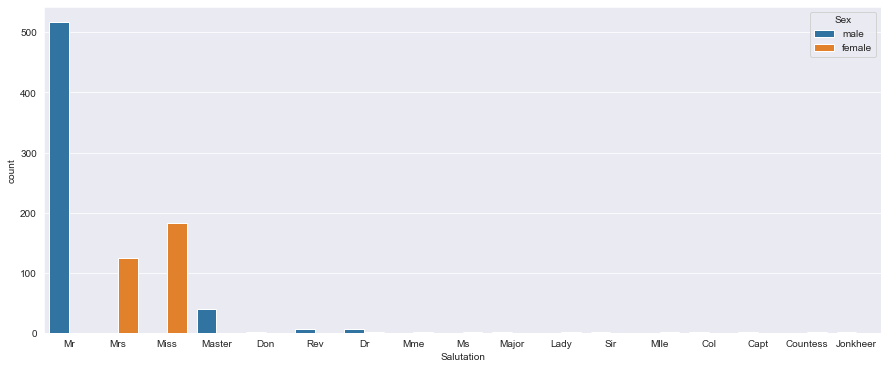

In [16]:
_,ax = plt.subplots(1,1,figsize=(15,6))

sns.countplot(df.Salutation, hue="Sex",data=df,ax=ax);

In [17]:
pd.crosstab(df.Sex, df.Salutation)


Salutation,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [18]:
to_replace = ["Don", "Rev", "Dr","Sir","Capt","Col","Countess","Jonkheer","Major","Mlle","Mme","Ms"]

df.loc[(df.Salutation == "Don") | (df.Salutation == "Rev") | (df.Salutation == "Dr") | (df.Salutation == "Lady") | (df.Salutation == "Sir") | (df.Salutation == "Capt") | (df.Salutation == "Col") | (df.Salutation == "Countess") | (df.Salutation == "Jonkheer") | (df.Salutation == "Major") | (df.Salutation == "Mlle") | (df.Salutation == "Mme") | (df.Salutation == "Ms"), "Salutation"] = "Others"

In [19]:
df.Salutation.value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Salutation, dtype: int64

In [20]:
mr_age_mean = int(round(df.loc[df.Salutation == "Mr"]["Age"].mean(),0))
mrs_age_mean = int(round(df.loc[df.Salutation == "Mrs"]["Age"].mean(), 0))
master_age_mean = int(round(df.loc[df.Salutation == "Master"]["Age"].mean(), 0))
miss_age_mean = int(round(df.loc[df.Salutation == "Miss"]["Age"].mean(), 0))
oth_age_mean = int(round(df.loc[df.Salutation == "Others"]["Age"].mean(), 0))

print(mr_age_mean, mrs_age_mean, master_age_mean, miss_age_mean, oth_age_mean)


32 36 5 22 42


In [21]:
df.loc[(df["Age"].isna()) & (df.Salutation == "Mr"), "Age"] = mr_age_mean
df.loc[(df["Age"].isna()) & (df.Salutation == "Mrs"), "Age"] = mrs_age_mean
df.loc[(df["Age"].isna()) & (df.Salutation == "Master"), "Age"] = master_age_mean
df.loc[(df["Age"].isna()) & (df.Salutation == "Miss"), "Age"] = miss_age_mean
df.loc[(df["Age"].isna()) & (df.Salutation == "Others"), "Age"] = oth_age_mean

In [22]:
max_occ = max(df.Embarked.value_counts())
df.loc[df["Embarked"].isna(), "Embarked"] = max_occ

In [23]:
df["Sex"].replace(["male","female"],[0,1],inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df['Salutation'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [24]:
df["FamilyCount"] = df["SibSp"] + df["Parch"] + 1

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Salutation',
       'FamilyCount'],
      dtype='object')

In [26]:
Y = df['Survived']
df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Salutation","Survived"],axis=1, inplace=True)
X = df

In [27]:
X.shape, Y.shape

((891, 6), (891,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 6) (179, 6) (712,) (179,)


In [29]:
# svm_model = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.02,verbose=True)
# svm_model.fit(X_train,y_train)
# y_pred = svm_model.predict(X_test)
# print(classification_report(y_test,y_pred))

In [30]:
rnd_forest_model = RandomForestClassifier(n_estimators=200)
rnd_forest_model.fit(X_train,y_train)
y_pred_rndforest = rnd_forest_model.predict(X_test)
print(classification_report(y_test,y_pred_rndforest))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       109
           1       0.86      0.77      0.81        70

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [31]:
df_test = pd.read_csv(r"C:\Users\jaysa\Desktop\test(titanic Survival Prediction).csv")

In [32]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
mean_fare = round(df_test["Fare"].mean(), 0)
mean_fare

36.0

In [34]:
df_test['Salutation'] = df_test.Name.str.extract('([A-Za-z]+)\.')

to_replace = ["Don", "Rev", "Dr","Sir","Capt","Col","Countess","Jonkheer","Major","Mlle","Mme","Ms"]

df_test.loc[(df_test.Salutation == "Don") | (df_test.Salutation == "Rev") | (df_test.Salutation == "Dr") | (df_test.Salutation == "Lady") | (df_test.Salutation == "Sir") | (df_test.Salutation == "Capt") | (df_test.Salutation == "Col") | (df_test.Salutation == "Countess") | (df_test.Salutation == "Jonkheer") | (df_test.Salutation == "Major") | (df_test.Salutation == "Mlle") | (df_test.Salutation == "Mme") | (df_test.Salutation == "Ms"), "Salutation"] = "Others"

mr_age_mean = int(round(df_test.loc[df_test.Salutation == "Mr"]["Age"].mean(),0))
mrs_age_mean = int(round(df_test.loc[df_test.Salutation == "Mrs"]["Age"].mean(), 0))
master_age_mean = int(round(df_test.loc[df_test.Salutation == "Master"]["Age"].mean(), 0))
miss_age_mean = int(round(df_test.loc[df_test.Salutation == "Miss"]["Age"].mean(), 0))
oth_age_mean = int(round(df_test.loc[df_test.Salutation == "Others"]["Age"].mean(), 0))

print(mr_age_mean, mrs_age_mean, master_age_mean, miss_age_mean, oth_age_mean)

df_test.loc[(df_test["Age"].isna()) & (df_test.Salutation == "Mr"), "Age"] = mr_age_mean
df_test.loc[(df_test["Age"].isna()) & (df_test.Salutation == "Mrs"), "Age"] = mrs_age_mean
df_test.loc[(df_test["Age"].isna()) & (df_test.Salutation == "Master"), "Age"] = master_age_mean
df_test.loc[(df_test["Age"].isna()) & (df_test.Salutation == "Miss"), "Age"] = miss_age_mean
df_test.loc[(df_test["Age"].isna()) & (df_test.Salutation == "Others"), "Age"] = oth_age_mean

max_occ = max(df_test.Embarked.value_counts())
df_test.loc[df_test["Embarked"].isna(), "Embarked"] = max_occ

df_test.loc[(df_test["Fare"].isna()), "Fare"] = mean_fare

df_test["Sex"].replace(["male","female"],[0,1],inplace=True)
df_test['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_test['Salutation'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

df_test["FamilyCount"] = df_test["SibSp"] + df_test["Parch"] + 1

passenger_ids = df_test["PassengerId"]

df_test.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Salutation"],axis=1, inplace=True)

X_sub = df_test

32 39 7 22 45


In [35]:
X_sub.isna().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilyCount    0
dtype: int64

In [36]:
y_sub = rnd_forest_model.predict(X_sub)

In [37]:
submission = pd.DataFrame(data=y_sub, columns=["Survived"])

In [38]:
submission["PassengerId"] = passenger_ids


In [39]:
submission.to_csv("submission.csv", index=False)